# Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import requests as rq
import re
import json
import datetime
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# Gathering Data

### importing the img predection file

In [2]:
#downloading and saving the Img predictions file    
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename= url.split('/')[-1]
response= rq.get(url)
with open(filename, 'wb') as file:
     file.write(response.content)
#opening the downloaded file
img_df= pd.read_csv('image-predictions.tsv',sep='\t')
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Importing data from the twitter archive

In [3]:
#importing the archive
tweets_df= pd.read_csv('twitter-archive-enhanced.csv',parse_dates=['timestamp'])
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Creating a DataFrame for API output

In [4]:
#creating a list to input json txt values
df_list=[]
with open('json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        twid=tweet['id']
        retwtc=tweet['retweet_count']
        favtwt=tweet['favorite_count']
        df_list.append({'tweet_id':twid,
                       'retweet_count':retwtc,
                       'favorite_count':favtwt})
api_df=pd.DataFrame(df_list)


# Assessing Data

In [5]:
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [7]:
tweets_df.rating_numerator.describe()


count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [8]:
tweets_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
tweets_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
tweets_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

### The quality issues found in the datasets are :
#### Archive Dataframe `tweets_df` : 
-  rating numenator (mean=13.12, over range values like 1776, has 2 zero value, has 438 values X<10 and 25 values X>20)
-  rating denominator(mean= 10.45, has over range values like 170 and 23 values not equal to 10)
-  most dogs stages has a value=None
-  some dogs has multiple dog stages need to be combined
-  timestamp need to be divded to day, month and year for easier categorizing the data
-  Dogs names show some typo errors and none values
#### Img prediction dataframe `img_df`:
-  clean all the images with no dog in 
-  Drop all entires with no images
### The untidy data isssues found in datasets are :
#### Archive Dataframe : 
-  all dog stages must be in one column under the name of dog stage
-  remove all the retweets and replies in the dataframe
#### API Dataframe:
-  remove all the retweets and replies in the dataframe
#### Img prediction dataframe:
-  remove all the retweets and replies in the dataframe
-  tiding the the img_df by substituting variables in column headers


# Cleaning Data

In [11]:
api_clean= api_df.copy()
img_clean= img_df.copy()
archive_clean= tweets_df.copy()

#### Define
- removing all tweets with no images
- removing all retweets and in_reply

##### Code

In [12]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_w_img = list(img_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_w_img) == archive_clean.tweet_id.isin(tweets_w_img).sum()

# Cleaning in action ;)
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_w_img)]

In [13]:
# extract the tweets that include data in the retweet_status_id.
retweet_entries = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_entries].shape[0]

# Dropping the retweets from the archive data set
archive_clean = archive_clean[~retweet_entries]

# Extracting replies entries with the same method as the retweets
inreplies_entries = archive_clean.in_reply_to_status_id.notnull()
archive_clean[inreplies_entries].shape[0]

# Dropping the replies from the archive data set
archive_clean = archive_clean[~inreplies_entries]

# Now we check the image_prediction table for extra tweet ids not in the archive table
np.logical_not(img_clean.tweet_id.isin(list(archive_clean.tweet_id)))

# Dropping the retweets and replies ids from the image prediction dataframe
img_clean=img_clean[~np.logical_not(img_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

# Now we check the api table for extra tweet ids not in the archive table
np.logical_not(api_clean.tweet_id.isin(list(archive_clean.tweet_id)))

# Dropping the retweets and replies ids from the api dataframe
api_clean=api_clean[~np.logical_not(api_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

##### Test

In [14]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

In [15]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [16]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1971 non-null   int64
 1   retweet_count   1971 non-null   int64
 2   favorite_count  1971 non-null   int64
dtypes: int64(3)
memory usage: 61.6 KB


##### Define
- removing empty columns retweets and inreplies

In [17]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

##### Code

In [18]:
archive_clean=archive_clean.dropna(how='all', axis=1)

###### Test

In [19]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

##### Define
###### After removing retweets and replies
-  rating denominator(mean= 10.47, has over range values like 170 and 18 values not equal to 10)
-  rating numerator (mean=12.22, over range values like 1776, has 1 zero value, has 100 values X<6 and values X>15)
-  some tweets has more than one dog we need to divde the denominator over number on dogs  at 433-902-1120-1228-1254-1274-1351-1433-1635-1779-1843
-  replace wrong numerators and denomenators at 2335-2074-1662-1202-1068-516-1508 with values 9/10-NaN-10/10-11/10-14/10-NaN-10/10 instead of 1/2-420/10-7/11-50/50-9/11-24/7-5/10
-  some tweets are floats and the values after decimal is shown in the numerator at 1712-763-695-45

In [20]:
archive_clean[archive_clean.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None


In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [22]:
archive_clean['rating_numerator']=archive_clean['rating_numerator'].astype(float)

##### Code

In [23]:
# Replacing non divisible by 10 values in rating_denominator
archive_clean[archive_clean.rating_denominator % 10 != 0]
archive_clean=archive_clean.replace([2,11,7],10)
archive_clean.rating_denominator.value_counts()

10     1958
50        3
80        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

In [24]:
# Cleaning values with wrong compiling at 2335-2074-1662-1202-1068-516-1508 
# with values 9/10-NaN-10/10-11/10-14/10-NaN-10/10 instead of 1/2-420/10-7/11-50/50-9/11-24/7-5/10
archive_clean.loc[(2335)]=archive_clean.loc[(2335)].replace(2,9).replace(1,10)
archive_clean.loc[(2074)]=archive_clean.loc[(2074)].replace(420," ").replace(10," ")
archive_clean.loc[(1662)]=archive_clean.loc[(1662)].replace(7,10).replace(11,10)
archive_clean.loc[(1202)]=archive_clean.loc[(1202)].replace(50,11).replace(50,10)
archive_clean.loc[(1068)]=archive_clean.loc[(1068)].replace(9,14).replace(11,10)
archive_clean.loc[(516)]=archive_clean.loc[(516)].replace(24,' ').replace(7,' ')
archive_clean.loc[(1508)]=archive_clean.loc[(1508)].replace(5,10)

In [25]:
# Compiling a regex to capture the decimal as well as whole numbers and testing it on some sample text from the dataframe
dpat = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
print(re.findall(dpat, 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'))
print(re.findall(dpat, 'This is Logan, the Chow who lived. He solemnly swears he''s up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS'))
# Fixing the numerator that have decimals at loc 1712-763-695-45 
# with values 11.26-11.27-9.75-13.5 instead of 26-27-75-5
archive_clean.loc[(1712)]=archive_clean.loc[(1712)].replace(26,11.26)
archive_clean.loc[(763)]=archive_clean.loc[(763)].replace(27,11.27)
archive_clean.loc[(695)]=archive_clean.loc[(695)].replace(75,9.75)
archive_clean.loc[(45)]=archive_clean.loc[(45)].replace(5,13.5)

[('13.5', '10')]
[('9.75', '10')]


In [26]:
# Changing tweets that has more than one dog so we need to 
# divde the denominator and numerator over number on dogs 
# at 433-902-1120-1228-1254-1274-1351-1433-1635-1779-1843 with values 7-15-17-9-8-5-5-4-11-12-8
loc_list={433,902,1120,1228,1254,1274,1351,1433,1635,1779,1843}
for n in loc_list:
    a= archive_clean.rating_denominator.loc[(n)]
    b= a/10
    c= archive_clean.rating_numerator.loc[(n)]
    d= c/b
    archive_clean.loc[(n)]=archive_clean.loc[(n)].replace(c,d).replace(a,10)


##### Test

##### Define
-  Dogs names show some typo errors and none values

In [27]:
archive_clean.name.value_counts()

None       524
a           55
Charlie     11
Oliver      10
Cooper      10
          ... 
Severus      1
my           1
Chloe        1
Nico         1
Bertson      1
Name: name, Length: 935, dtype: int64

##### Code

In [28]:
#writing a pattern extract dog names
pat0 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pat0, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            archive_clean.loc[index,'name'] = np.nan

            
archive_clean.name.value_counts(dropna = False)

NaN        592
Charlie     11
Lucy        10
Cooper      10
Oliver      10
          ... 
Grizz        1
Dutch        1
Severus      1
Chloe        1
Dex          1
Name: name, Length: 937, dtype: int64

###### Test

In [29]:
archive_clean.name.value_counts()

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
           ..
Karl        1
Grizz       1
Dutch       1
Severus     1
Bertson     1
Name: name, Length: 936, dtype: int64

##### Define
-  some dogs has multiple dog stages need to be combined in one column
-  most dogs stages has a value=None

In [30]:
archive_clean.doggo.value_counts()


None     1898
doggo      73
Name: doggo, dtype: int64

In [31]:
archive_clean.puppo.value_counts()


None     1948
puppo      23
Name: puppo, dtype: int64

In [32]:
archive_clean.pupper.value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [33]:
archive_clean.floofer.value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

##### Code

In [34]:
archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace('None','')

In [35]:
# Combining the dog stages under one column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
# Fixing the empty string issue for more accurate representation of vlues
archive_clean.loc[archive_clean.dog_stage == "", 'dog_stage'] = np.nan
# Separating the stacked stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'


###### Test

In [36]:
archive_clean.dog_stage.value_counts(dropna = False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   object             
 6   rating_denominator  1971 non-null   object             
 7   name                1379 non-null   object             
 8   dog_stage           303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 234.0+ KB


##### Define
-  timestamp need to be divded to day, month and year for easier categorizing the data

##### Code

In [38]:
archive_clean['month']=archive_clean['timestamp'].dt.month
archive_clean['day']=archive_clean['timestamp'].dt.weekday
archive_clean['year']=archive_clean['timestamp'].dt.year

###### Test

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   object             
 6   rating_denominator  1971 non-null   object             
 7   name                1379 non-null   object             
 8   dog_stage           303 non-null    object             
 9   month               1971 non-null   int64              
 10  day                 1971 non-null   int64              
 11  year                1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4

##### Define
-  tiding the the img_df by substituting variables in column headers

In [40]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


##### Code

In [54]:
#Removing invalid predictions
if 'p1' in img_clean:
    img_clean['p1'][img_clean['p1_dog']==0]=img_clean['p1'][img_clean['p1_dog']==0].where(img_clean['p1_dog'],other='')
    img_clean['p2'][img_clean['p2_dog']==0]=img_clean['p2'][img_clean['p2_dog']==0].where(img_clean['p2_dog'],other='')
    img_clean['p3'][img_clean['p3_dog']==0]=img_clean['p3'][img_clean['p3_dog']==0].where(img_clean['p3_dog'],other='')
    print(img_clean[['p1','p1_dog']].value_counts())

In [42]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
img_clean.columns = cols

# Reshaping the dataframe
test = pd.wide_to_long(img_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()
# Dropping the low predictions and taking Prediction 1 only for merging in new archive
img_clean1= img_clean.drop(['prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3'],axis=1)
col=['tweet_id', 'jpg_url', 'img_num', 'breed', 'confidence', 'prediction']
img_clean1.columns=col

In [43]:
img_clean1

,tweet_id,jpg_url,img_num,breed,confidence,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True


In [44]:
test

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
...,...,...,...,...,...,...,...
5908,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
5909,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
5910,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,,0.097049,False
5911,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,,0.085851,False


# Merging DataFrames

In [45]:
from functools import reduce
dfs=[img_clean1,archive_clean,api_clean]
archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'),dfs)

In [46]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   jpg_url             1971 non-null   object             
 2   img_num             1971 non-null   int64              
 3   breed               1971 non-null   object             
 4   confidence          1971 non-null   float64            
 5   prediction          1971 non-null   bool               
 6   timestamp           1971 non-null   datetime64[ns, UTC]
 7   source              1971 non-null   object             
 8   text                1971 non-null   object             
 9   expanded_urls       1971 non-null   object             
 10  rating_numerator    1971 non-null   object             
 11  rating_denominator  1971 non-null   object             
 12  name                1379 non-null 

# Visuals and insights

In [47]:
archive_master['dog_stage'].value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

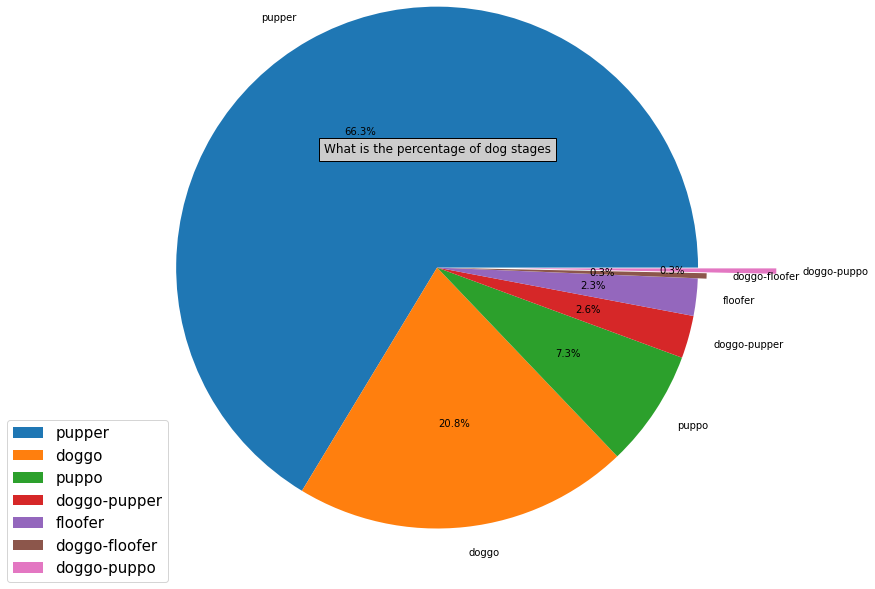

In [48]:
%matplotlib inline
# Visualising the dog stage values in the archive
labels='pupper','doggo','puppo','doggo-pupper','floofer','doggo-floofer' ,'doggo-puppo' 
explode = (0, 0, 0, 0,0,0.1,0.9)
dsvc=archive_master['dog_stage'].value_counts()
fig0, ax0=plt.subplots()
ax0.pie(dsvc, explode=explode, labels=labels, autopct='%1.1f%%',radius=3)
ax0.legend(loc='upper left',prop={'size': 15},labels=labels,bbox_to_anchor=(-.5, 0),bbox_transform=fig0.transFigure)
ax0.set_title('What is the percentage for each dog stage', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

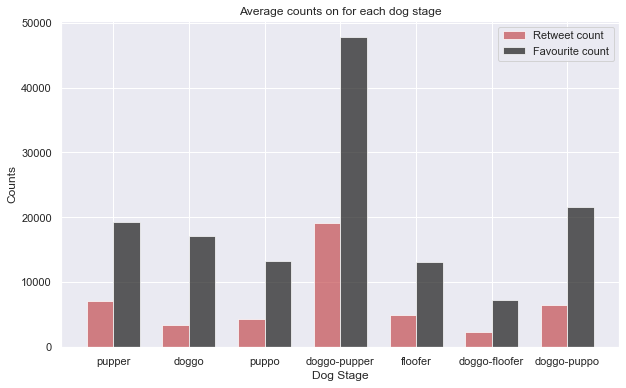

In [49]:
sb.set_context(context='notebook')
sb.set(rc={'figure.figsize':(10,6)})
# retweet count per dog stage
avg_rtwt_ds = archive_master.groupby('dog_stage').retweet_count.mean()

# the index with stand for the x axis in plotting 
avg_rtwt_ds.index

# favourite count per dog stage
avg_fav_ds = archive_master.groupby('dog_stage').favorite_count.mean()  

width = 0.35
ind = np.arange(len(avg_rtwt_ds))

rtwt_bars = plt.bar(ind, avg_rtwt_ds, width, color='r', alpha=.7, label='Retweet count')
fav_bars = plt.bar(ind + width, avg_fav_ds, width, color='k', alpha=.7, label='Favourite count')

# title and labels
plt.ylabel('Counts')
plt.xlabel('Dog Stage')
plt.title('Average counts on for each dog stage')
locations = ind + width / 2  # xtick locations
labels = ['pupper','doggo','puppo','doggo-pupper','floofer','doggo-floofer' ,'doggo-puppo']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

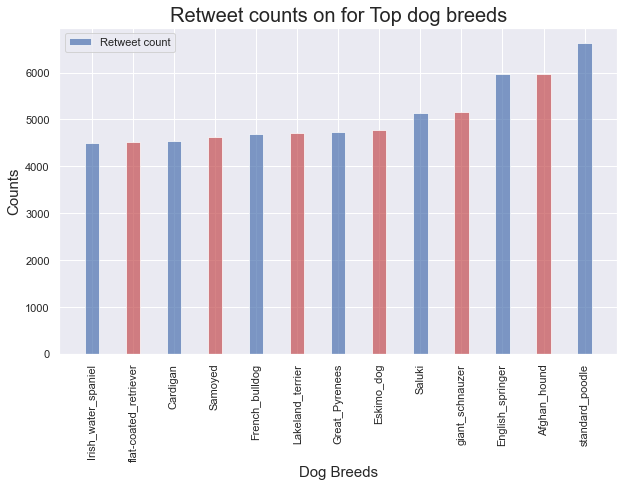

In [50]:
sb.set_context(context='notebook')
sb.set(rc={'figure.figsize':(10,6)})
# retweet count per dog stage
avg_rtwt_db = archive_master.groupby('breed').retweet_count.mean().sort_values(ascending=False)[12::-1]

# the index with stand for the x axis in plotting 
avg_rtwt_db.index

width = 0.35
ind = range(0,len(avg_rtwt_db))

rtwt_bars = plt.bar(ind, avg_rtwt_db, width, color='br', alpha=.7, label='Retweet count')

# title and labels
plt.ylabel('Counts', fontsize='15')
plt.xlabel('Dog Breeds', fontsize='15')
plt.title('Retweet counts on for Top dog breeds', fontsize='20')
locations = ind # x locations
labels = []  # x labels
plt.xticks(locations,list(avg_rtwt_db.index), rotation = 'vertical')

# legend
plt.legend()

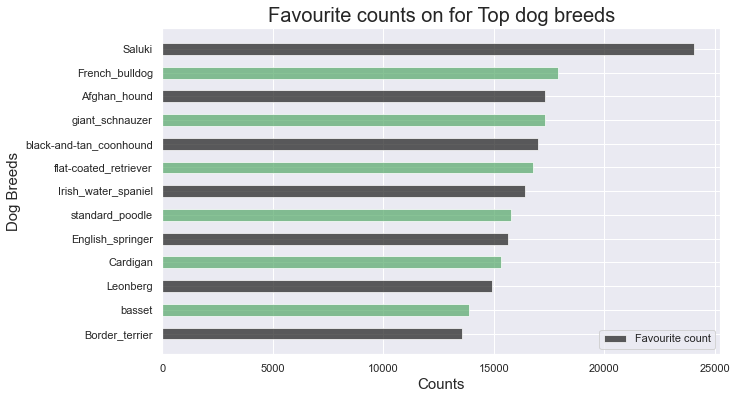

In [51]:
# favourite count per dog stage
avg_fav_db = archive_master.groupby('breed').favorite_count.mean().sort_values(ascending=False)[12::-1]
# the index with stand for the x axis in plotting 
avg_fav_db.index

width = 0.5
ind = range(0,len(avg_fav_db))
fav_bars = plt.barh(ind, avg_fav_db, width, color='kg', alpha=.7, label='Favourite count')
# title and labels
plt.ylabel('Dog Breeds', fontsize='15')
plt.xlabel('Counts', fontsize='15')
plt.title('Favourite counts on for Top dog breeds', fontsize='20')
locations = ind  # xtick locations
labels = list(avg_fav_db.index)
plt.yticks(locations, labels)
# legend
plt.legend()

(0.0, 1.5)

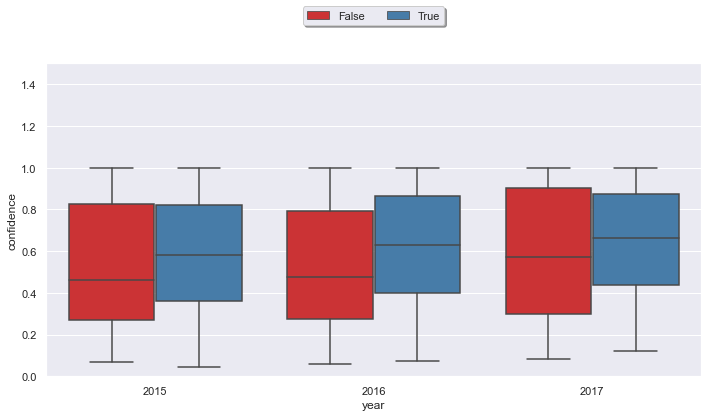

In [55]:
sb.boxplot(archive_master.year,archive_master.confidence, hue=archive_master.prediction, palette="Set1");
plt.legend(loc=8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2)  ,ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.ylim(0,1.5)

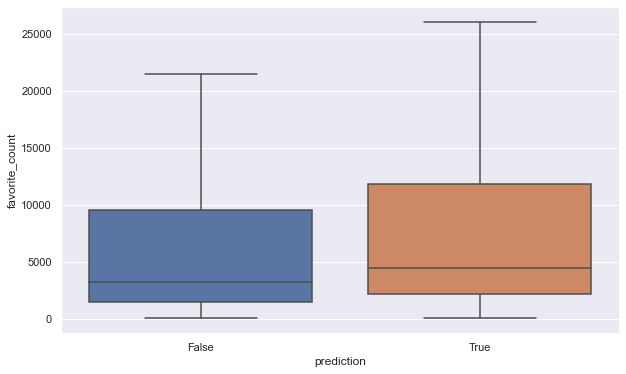

In [56]:
ax = sb.boxplot(x='prediction', y='favorite_count', data=archive_master, showfliers=False)


# Storing

In [57]:
archive_master.to_csv('twitter_archive_master.csv',index=False)

In [58]:
test = pd.read_csv('twitter_archive_master.csv')
test

,tweet_id,jpg_url,img_num,breed,confidence,prediction,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,month,day,year,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10,NaN,NaN,11,6,2015,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,10.0,10,NaN,NaN,11,6,2015,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,NaN,11,6,2015,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,NaN,11,0,2015,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,NaN,11,0,2015,41,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,7,5,2017,9774,41048
1967,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,False,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,7,6,2017,8964,42908
1968,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,7,0,2017,4328,25461
1969,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihu